IMPORT CORRECT PACKAGES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score

from pandas.plotting import scatter_matrix

/Users/nathanhollenberg/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/nathanhollenberg/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Load Data From Kirk

In [2]:
# load data
data = pd.read_csv("kirk_data_1.csv")

In [3]:
# find shape of data
data.shape

(1048575, 13)

In [4]:
data[data['player_id'] == 1627751]

,game_id,team_id,Team,player_id,Player,period,gc_time,X_loc,Y_loc,three,made,fouled,assist_opp
306147,21700027,1610612761,Toronto,1627751,Jakob Poeltl,3,194.08,-38.86,-1.38,0,1,0,1
306151,21700046,1610612761,Toronto,1627751,Jakob Poeltl,1,220.76,-39.93,-4.92,0,1,0,1
306152,21700046,1610612761,Toronto,1627751,Jakob Poeltl,2,111.60,-39.55,-2.90,0,1,0,1
306154,21700046,1610612761,Toronto,1627751,Jakob Poeltl,4,617.68,-41.21,2.24,0,1,0,1
306159,21700063,1610612761,Toronto,1627751,Jakob Poeltl,1,97.80,-41.33,-0.84,0,1,0,1
306162,21700063,1610612761,Toronto,1627751,Jakob Poeltl,4,106.48,-41.07,2.74,0,0,0,1
307356,21700063,1610612761,Toronto,1627751,Jakob Poeltl,4,486.76,-43.15,-0.44,0,1,0,0
307363,21700076,1610612761,Toronto,1627751,Jakob Poeltl,2,555.76,-40.66,1.94,0,1,1,1
307364,21700076,1610612761,Toronto,1627751,Jakob Poeltl,2,499.32,-41.48,2.55,0,1,0,1
307367,21700099,1610612761,Toronto,1627751,Jakob Poeltl,1,225.24,-36.80,-5.15,0,0,0,1


Drop the previous years data that does not have X, Y Location

In [5]:
# just get data with shots
data = data.dropna(subset=['X_loc', 'Y_loc'])

In [6]:
# find new shape
data.shape

(456395, 13)

Create new features from the coordinates (Distance and Angle)

In [7]:
# create point
data['Point'] = list(zip(data.X_loc, data.Y_loc))

In [8]:
#initialize hoop
hoop = (-41.75, 0)

In [9]:
data['Distance'] = data['Point'].apply(lambda x: distance.euclidean(x, hoop))

In [10]:
data = data.drop(['Point'], axis = 1)

In [11]:
data.head()

,game_id,team_id,Team,player_id,Player,period,gc_time,X_loc,Y_loc,three,made,fouled,assist_opp,Distance
0,21700031,1610612759,San Antonio,200746,LaMarcus Aldridge,2,416.40,-17.68,6.22,1,0,0,1,24.860678
1,21700031,1610612759,San Antonio,200746,LaMarcus Aldridge,2,226.08,-39.82,-0.22,0,0,0,1,1.942498
2,21700031,1610612759,San Antonio,200746,LaMarcus Aldridge,2,181.88,-28.46,9.57,0,1,0,1,16.377088
3,21700031,1610612759,San Antonio,200746,LaMarcus Aldridge,3,573.04,-40.36,13.95,0,0,0,0,14.019080
4,21700046,1610612759,San Antonio,1938,Manu Ginobili,1,203.64,-19.51,-10.09,1,1,0,1,24.421828


Take absolute value of angle, to make them the same --> Angle and the side of the court (assymetric relationship)

In [12]:
# fix indexing issue
data = data.reset_index()
data = data.drop('index', axis = 1)

## Create Angles

In [13]:
import math
angles = []
rightside = []
for i in range(len(data)):
    angle = math.atan2(data['Y_loc'][i] - hoop[1], data['X_loc'][i] - hoop[0])
    if angle <= 0:
        rightside.append(1)
    else:
        rightside.append(0)
    angle_real = abs(angle * (180/math.pi))
    angles.append(angle_real)

In [14]:
data['angle'] = angles
data['rightside'] = rightside

In [15]:
data.head()

,game_id,team_id,Team,player_id,Player,period,gc_time,X_loc,Y_loc,three,made,fouled,assist_opp,Distance,angle,rightside
0,21700031,1610612759,San Antonio,200746,LaMarcus Aldridge,2,416.40,-17.68,6.22,1,0,0,1,24.860678,14.489010,0
1,21700031,1610612759,San Antonio,200746,LaMarcus Aldridge,2,226.08,-39.82,-0.22,0,0,0,1,1.942498,6.503056,1
2,21700031,1610612759,San Antonio,200746,LaMarcus Aldridge,2,181.88,-28.46,9.57,0,1,0,1,16.377088,35.757294,0
3,21700031,1610612759,San Antonio,200746,LaMarcus Aldridge,3,573.04,-40.36,13.95,0,0,0,0,14.019080,84.309740,0
4,21700046,1610612759,San Antonio,1938,Manu Ginobili,1,203.64,-19.51,-10.09,1,1,0,1,24.421828,24.403180,1


In [16]:
data = data.drop(data[(data.three == 0) & (data.Distance > 40.0)].index)

In [17]:
data.to_csv("r_data.csv")

Subset Data For Made Shots

In [18]:
data_made = data[data['made'] == 1]

Come back to this graph

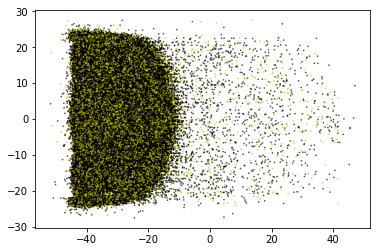

In [19]:
colors = np.where(data_made['three'] == 1,'y','k')
plt.scatter(data['X_loc'], data['Y_loc'], s = 0.5, alpha= 0.6, c = colors)
plt.show()

EDA Visualizataions

In [ ]:
colors = np.where(data['three'] == 1,'y','k')
plt.scatter(data['X_loc'], data['Y_loc'], s = 0.5, alpha= 0.6, c = colors)
plt.show()

Drop the miss classified shots --> Flip the X

Look at it for Made Shots

In [ ]:
data.shape

In [ ]:
colors = np.where(data['three'] == 1,'y','r')
plt.scatter(data['X_loc'], data['Y_loc'], s = 0.5, alpha= 0.6, c = colors)
plt.show()

In [ ]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt


heatmap, xedges, yedges = np.histogram2d(data['X_loc'], data['Y_loc'], bins=250)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

Stacked Histogram or Bar Plot where the groups are if it is
Or put 2 histrograms on the same plot

In [ ]:
plt.hist(data['Distance'], bins = 25)
plt.show()

Build Histogram that shows both

In [ ]:
plt.hist(data[data['three'] == 1]['Distance'], bins = 10)
plt.hist(data[data['three'] == 0]['Distance'], bins = 10)

plt.xlim(0,50)
plt.title("Histogram of Shot Distance for 2017 and 2018 NBA")
plt.xlabel("Feet")
plt.ylabel("Frequency")
plt.show()

In [ ]:
miss_pct = data['made'].value_counts()[0]/(data['made'].value_counts()[1] + data['made'].value_counts()[0])
made_pct = data['made'].value_counts()[1]/(data['made'].value_counts()[1] + data['made'].value_counts()[0])

In [ ]:
miss_pct

In [ ]:
made_pct

In [ ]:
three_point_data = data[data['three'] == 1]

In [ ]:
three_point_miss_pct = three_point_data['made'].value_counts()[0]/(three_point_data['made'].value_counts()[1] + three_point_data['made'].value_counts()[0])
three_point_made_pct = three_point_data['made'].value_counts()[1]/(three_point_data['made'].value_counts()[1] + three_point_data['made'].value_counts()[0])

In [ ]:
three_point_made_pct

In [ ]:
three_point_miss_pct

Mixed effects model --> will be the best way to handle all the different player ID's\
fixed effect are overfit --> don't care for inferences
random effect will weight everyones observed shots vs. individual shots
effect for random slopes and intercepts
careful in building those models --> cross validate to find best hyper parameters
--> consider collapsing players based on # of shots or 3 -points, average distance of shot, etc.
--> angle of shot
--> Do parametric and non parametric
--> Visualize the results of that on the court; predicted probability of shot in kind of like a heat map, and do that for individual players.
--> look to see what team they are; look at game clock of all of those shots to make sure
--> ones that aren't in the last few seconds of the quarter that are beyond half court

Baseline Logistic Regression

In [ ]:
model1 = LogisticRegression()

In [ ]:
cols_to_drop = ['game_id', 'team_id', 'Team', 'Player']
reg_data = data.drop(cols_to_drop, axis = 1)



Catch and shoot, defense, wide open

In [ ]:
reg_data.describe()

In [ ]:
data_train, data_test = train_test_split(reg_data, random_state = 42, test_size = 0.2)

In [ ]:
print(data_train.columns)

In [ ]:
x_train = data_train.drop(['made'], axis = 1)
y_train = data_train['made']

x_test = data_test.drop(['made'], axis = 1)
y_test = data_test['made']

In [ ]:
model1.fit(x_train, y_train)

In [ ]:
y_pred = model1.predict(x_test)

In [ ]:
y_pred_proba = model1.predict_proba(x_test)

In [ ]:
auc_score = metrics.roc_auc_score(y_test, y_pred)

In [ ]:
auc_score

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
probs = model1.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


How to shrink this, pull 10% of data and then optimize within that set --> And then move it around when you can

In [ ]:
x_train_ind = list(x_train.index.values)

In [ ]:
import random
sample_size = round(len(x_train) * 0.1)

x_train_sub_ind= random.sample(x_train_ind, sample_size)

In [ ]:
x_train_sub = x_train.loc[x_train_sub_ind]

In [ ]:
y_train_sub = y_train.loc[x_train_sub_ind]

Hard to get player specific --> Try to one hot encode it --> Probably will overfit to those who take a few shots

Set n estimators to 100

n_estimators = number of trees in the foreset
max_features = max number of features considered for splitting a node
max_depth = max number of levels in each decision tree
min_samples_split = min number of data points placed in a node before the node is split
min_samples_leaf = min number of data points allowed in a leaf node
bootstrap = method for sampling data points (with or without replacement)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 40, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train_sub, y_train_sub)

In [ ]:
rf_random.best_params_

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 5, 8, 10],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [2, 4, 6],
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(x_train_sub, y_train_sub)

In [ ]:
grid_search.best_params_

In [ ]:
rf = RandomForestClassifier(bootstrap=True, max_depth=5, min_samples_leaf=5, min_samples_split = 4)

In [ ]:
rf.fit(x_train, y_train)

In [ ]:
prediction_probs = rf.predict_proba(x_test)

In [ ]:
rf_predictions = rf.predict(x_test)

In [ ]:
accuracy_score(y_test, rf_predictions)

In [ ]:
prediction_probs

In [ ]:
pred_1 = prediction_probs[:,1]

In [ ]:
preds = prediction_probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Heatmap of Predicted probabilities

In [ ]:
x_test['Preds'] = pred_1

In [ ]:
x_test.head()

In [ ]:
plt.scatter(x_test['X_loc'], x_test['Y_loc'], c = x_test['Preds'], alpha = 0.3)
plt.show()

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# X = x_test['X_loc']
# Y = x_test['Y_loc']
# Z = x_test['Preds']
# data = pd.DataFrame({'X': X, 'Y': Y, 'Z': Z})
# data_pivoted = data.pivot("X", "Y", "Z")
# ax = sns.heatmap(data_pivoted)
# plt.show()

plt.hexbin(x_test['X_loc'], x_test['Y_loc'], C=x_test['Preds'], gridsize=20, cmap="YlOrBr")
plt.colorbar()
plt.show()
#h2 = ax2.hexbin(df.v1, df.v2, C=df.yy, gridsize=10, cmap="copper")

Lets look at three point line

In [ ]:
x_test.head()

In [ ]:
three_point = x_test[(x_test['Distance'] > 21) & (x_test['Distance'] < 24)]

In [ ]:
three_point.head()

In [ ]:
plt.hexbin(three_point['X_loc'], three_point['Y_loc'], C=three_point['Preds'], gridsize=25, cmap="YlOrBr")
plt.colorbar()
plt.show()

Predictions

In [ ]:
x_test[(x_test['Distance'] > 20) & (x_test['Distance'] < 21)]['Preds'].mean()

In [ ]:
x_test[(x_test['Distance'] > 21) & (x_test['Distance'] < 22)]['Preds'].mean()

In [ ]:
x_test[(x_test['Distance'] > 22) & (x_test['Distance'] < 23)]['Preds'].mean()

In [ ]:
x_test[(x_test['Distance'] > 23) & (x_test['Distance'] < 24)]['Preds'].mean()

BIG Difference between 20 and 21

In [ ]:
two_point = x_test[(x_test['Distance'] > 21) & (x_test['Distance'] < 23.76) & (x_test['three'] == 0)]

In [ ]:
two_mean = two_point['Preds'].mean()
print(two_mean)

In [ ]:
three_point = x_test[(x_test['Distance'] > 22) & (x_test['Distance'] < 25) & (x_test['three'] == 1)]

In [ ]:
three_mean = three_point['Preds'].mean()
print(three_mean)

Real statistics

In [ ]:
two_point_real = data[(data['Distance'] > 21) & (data['Distance'] < 23.76) & (data['three'] == 0)]
miss_pct_two_point_real = two_point_real['made'].value_counts()[0]/(two_point_real['made'].value_counts()[1] + two_point_real['made'].value_counts()[0])
made_pct_two_point_real = two_point_real['made'].value_counts()[1]/(two_point_real['made'].value_counts()[1] + two_point_real['made'].value_counts()[0])


In [ ]:
three_point_real = data[(data['Distance'] > 22) & (data['Distance'] < 25) & (data['three'] == 1)]
miss_pct_three_point_real = three_point_real['made'].value_counts()[0]/(three_point_real['made'].value_counts()[1] + three_point_real['made'].value_counts()[0])
made_pct_three_point_real = three_point_real['made'].value_counts()[1]/(three_point_real['made'].value_counts()[1] + three_point_real['made'].value_counts()[0])
print('Three Miss: ', miss_pct_three_point_real)
print('Three Made: ', made_pct_three_point_real)
print('Long Two Miss: ', miss_pct_two_point_real)
print('Long Two Made: ', made_pct_two_point_real)

Subset data to just these shots, and just fit a parametric model
Confunded are better shooters are shooting the 3's, and worse shooters shooting the 2's
Take all shots between 20 and 24 feet, and do a  mixed effects with player id as random effect



## Random forest Interpretation

Does not need to be as 
Overfit model.....to specific condiitons...need to tune hyper paramters in better way!

In [ ]:
# rework x_train
x_train_int = x_train[['period', 'gc_time', 'three', 'fouled', 'assist_opp', 'Distance', 'angle', 'rightside']]


In [ ]:
x_train_int.head()

For angle on catch and shoot threes

In [ ]:
len(angles)

In [ ]:
x_test[x_test['three'] == 1]['Distance'].median()

In [ ]:
n_points = 1000
iterator = n_points/100

In [ ]:
import numpy as np
angles = np.arange(0, 100, 0.1).tolist()

In [ ]:
angle_frame = pd.DataFrame()
angle_frame['period'] = [x_test['period'].median()] * len(angles)
angle_frame['gc_time'] = [x_test['gc_time'].median()] * len(angles)
angle_frame['three'] = [0] * len(angles)
angle_frame['fouled'] = [0] * len(angles)
angle_frame['assist_opp'] = [1] * len(angles)
#angle_frame['Distance'] = [x_test[x_test['three'] == 1]['Distance'].median()]*len(angles)
angle_frame['rightside'] =  [1] * len(angles)
angle_frame['angle'] =  angles
angle_frame['Distance'] = [8] * len(angles)





    
        
        

In [ ]:
angle_frame.head()

In [ ]:
preds_angle = rf.predict_proba(angle_frame)

In [ ]:
angle_frame['predictions'] = preds_angle[:,1]

In [ ]:
plt.plot(angle_frame['angle'], angle_frame['predictions'])
plt.show()

Score it with AUC, and other ROC curve methods on the best way. Change the threshold, and see what possible 

Look at predicted probability at each spot on the court -->  Prediction at each grid location --> Would be like the heat map I made above but with predicted probabilities

If I have time --> neural network

Plug in median --> and then see how they vary as they increase --> X and Y location

See if anything is different for assist opportunity, quarter, Like what I did for march madness model

Predicted Probalities --> IS there a jump at the three point line...look at shots between distance 21-24

Distance is more important than angle...fiddle around with what to include in the model

Build model without player id, and see if someone does better than they should?

Add in distance into the mixed effects model